In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

<StemContainer object of 3 artists>

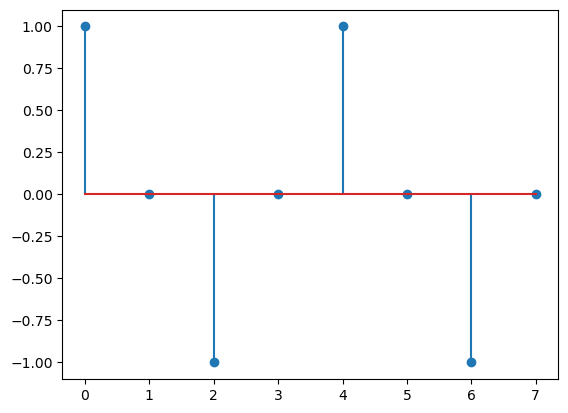

In [2]:
# A toy example shows how a sequence of samples from
# a time domain is mapped into a frequency domain using
# a Discrete Fourier Transformation.

k = np.arange(0,8)
x = np.cos(2*k*np.pi/4) 

plt.stem(k, x, use_line_collection=True)

In [3]:
X = sp.fft.fft(x)
print(X)


[-2.44929360e-16-0.00000000e+00j -3.46382422e-16+0.00000000e+00j
  4.00000000e+00-9.79717439e-16j  3.46382422e-16+0.00000000e+00j
  2.44929360e-16-0.00000000e+00j  3.46382422e-16-0.00000000e+00j
  4.00000000e+00+9.79717439e-16j -3.46382422e-16-0.00000000e+00j]


<StemContainer object of 3 artists>

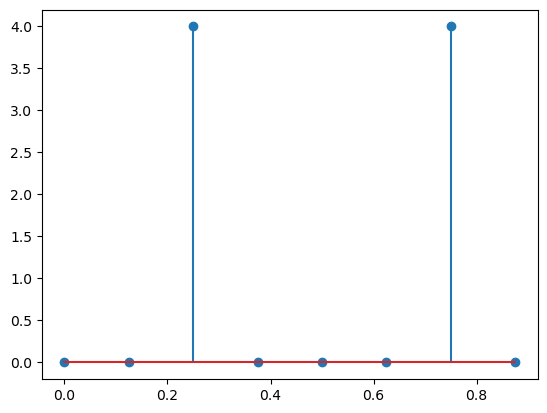

In [4]:
F = np.linspace(0, 1, len(X)+1)
F = F[:-1]

plt.stem(F, np.absolute(X), use_line_collection=True)

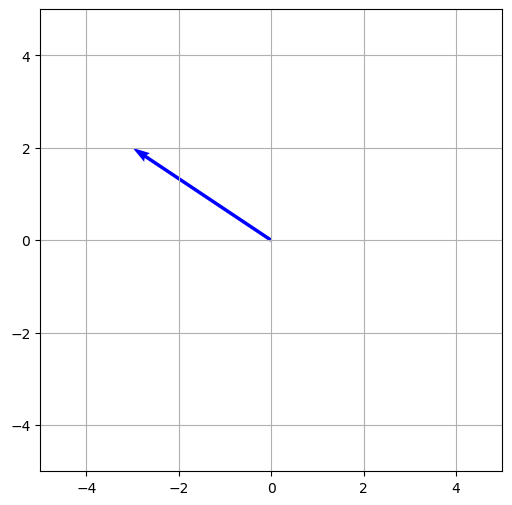

In [5]:
vec = np.array([[-3],[2]])
origin = np.zeros(vec.shape) # origin point

plt.figure(figsize=(6,6))
plt.quiver(*origin, *vec, color=['b'], scale=1, units='xy')

plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect('equal')
plt.show()


In [6]:
theta = np.radians(-90)
R = np.zeros((2,2))
R[0,0] = np.cos(theta)
R[0,1] = -np.sin(theta)
R[1,0] = np.sin(theta)
R[1,1] = np.cos(theta)

print(R) 

[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]


In [7]:
new = np.zeros(vec.shape)

new[0] = R[1,1]*vec[0] + R[0,1]*vec[1]
new[1] = R[1,0]*vec[0] + R[0,0]*vec[1]


# Numpy allows us to do vector-matrix multiplication much faster
new = R.dot(vec) 

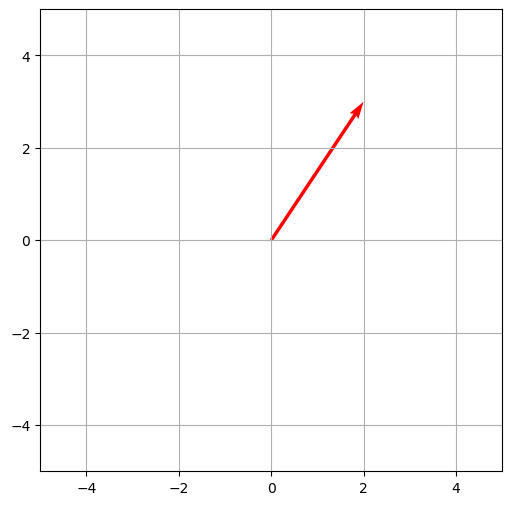

In [8]:
origin = np.zeros(new.shape) # origin point

plt.figure(figsize=(6,6))
plt.quiver(*origin, *new, color=['r'], scale=1, units='xy')

plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
x_grid = np.linspace(-10,10,20)
y_grid = np.linspace(-10,10,20)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

(-11.0, 11.0, -11.0, 11.0)

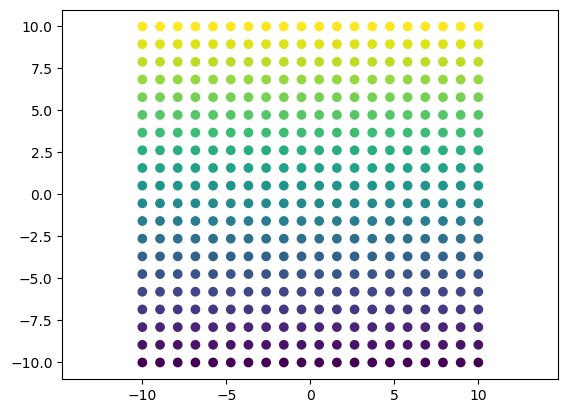

In [10]:
plt.scatter(x_mesh,y_mesh, c=y_mesh)
plt.axis('equal') 

(-22.0, 22.0, -11.0, 11.0)

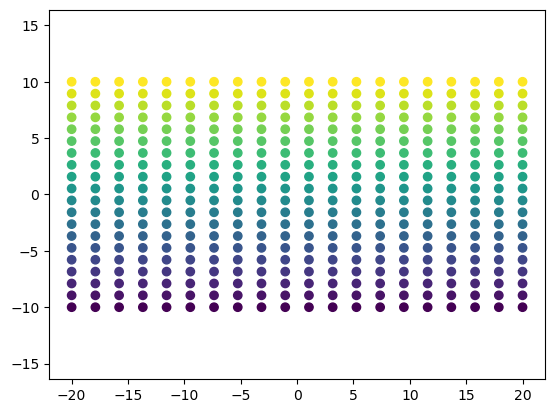

In [11]:
#streching along the x axis
A2 = np.zeros((2,2))
A2[0,0] = 2
A2[1,1] = 1

X_new_mesh_2 = A2[0,0] * x_mesh + A2[0,1] * y_mesh
Y_new_mesh_2 = A2[1,0] * x_mesh + A2[1,1] * y_mesh

plt.scatter(X_new_mesh_2,Y_new_mesh_2, c=y_mesh)
plt.axis('equal')

In [12]:
A = np.zeros((2,2))
theta = np.pi / 4; 
A[0,0] = np.cos(theta)
A[0,1] = - np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

print(A)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [13]:
X_new_mesh = A[0,0] * x_mesh + A[0,1] * y_mesh
Y_new_mesh = A[1,0] * x_mesh + A[1,1] * y_mesh

(-15.556349186104047,
 15.556349186104047,
 -15.556349186104047,
 15.556349186104047)

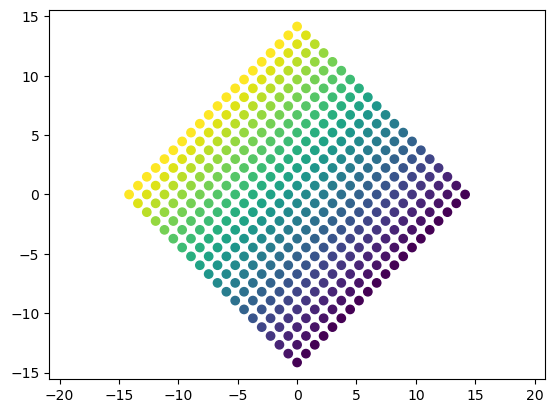

In [14]:
plt.scatter(X_new_mesh,Y_new_mesh, c=y_mesh)
plt.axis('equal')

(-22.0, 22.0, -11.0, 11.0)

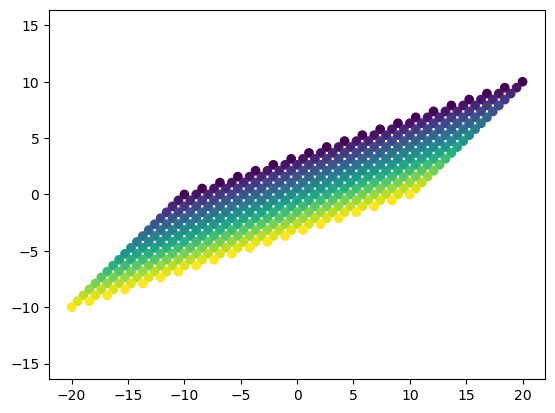

In [15]:
# General linear mapping
# A matrix A has two linearly independent columns.

A3 = np.zeros( (2,2))

A3[0,0] = 3./2
A3[0,1] = -1/2
A3[1,0] = 1./2
A3[1,1] = -1./2

X_new_mesh_3 = A3[0,0] * x_mesh + A3[0,1] * y_mesh
Y_new_mesh_3 = A3[1,0] * x_mesh + A3[1,1] * y_mesh

plt.scatter(X_new_mesh_3, Y_new_mesh_3, c=y_mesh)
plt.axis('equal')

(-33.0, 33.0, -66.0, 66.0)

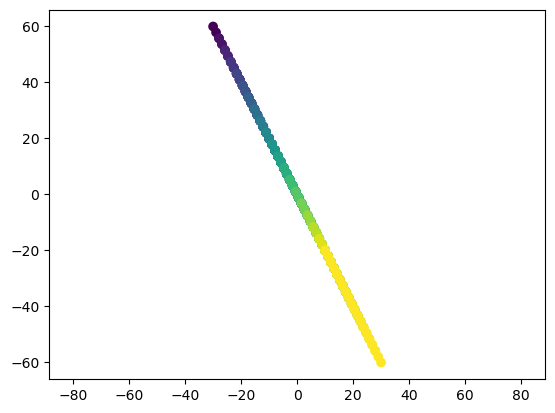

In [16]:
# General linear mapping
# A matrix A has two linearly dependent columns.

A4 = np.zeros((2,2))

A4[0,0] = 1
A4[0,1] = 2
A4[1,0] = -2
A4[1,1] = -4

X_new_mesh_4 = A4[0,0] * x_mesh + A4[0,1] * y_mesh
Y_new_mesh_4 = A4[1,0] * x_mesh + A4[1,1] * y_mesh

plt.scatter(X_new_mesh_4, Y_new_mesh_4, c=y_mesh)
plt.axis('equal')